<a href="https://colab.research.google.com/github/pravalika29/DS_Projects/blob/master/Number_Recognition_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
ls 

drive/  sample_data/


In [31]:
df=pd.read_csv('/content/drive/My Drive/Deep Learning-Pravalika/data/numbers.csv')

In [32]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
# ind and dep 
x=df.iloc[:,1:].values
y=df.iloc[:,0:1].values

In [35]:
# one colums
one =  OneHotEncoder()

In [36]:
y_one=one.fit_transform(y).toarray()

In [37]:
## Data Preproessing (min & max scaling = (x-xmin )/(xmax - xmin))
x_norm = x / x.max()

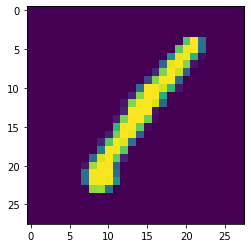

In [38]:
plt.imshow(x[0:1].reshape((28,28)))

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_norm,y_one,test_size=0.2,stratify=y)

In [40]:
x_train.shape , y_train.shape

((33600, 784), (33600, 10))

In [42]:
#need to pass 4D tensor
x_train_r = x_train.reshape((33600,28,28,1))
x_test_r = x_test.reshape((8400,28,28,1))

x_train_r.shape , x_test_r.shape

((33600, 28, 28, 1), (8400, 28, 28, 1))

In [43]:
x_train_r[0].shape

(28, 28, 1)

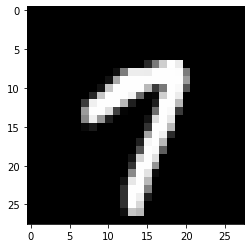

In [44]:
plt.imshow(x_train_r[0].reshape((28,28)),cmap='gray')

In [45]:
%tensorflow_version 2.x

In [46]:
import tensorflow as tf
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense,Conv2D , MaxPooling2D , Flatten ,Dropout

In [47]:
tfb = tf.keras.callbacks.TensorBoard(log_dir='cnn_mnist')

In [50]:
def cnn():
  ## Convolutional layer
  model = Sequential([
                      Conv2D(32,kernel_size=(3,3),strides=(1,1),padding='SAME',
                            activation='relu',input_shape=(28,28,1)) , # Convolution layer-1
                      MaxPooling2D(pool_size=(2,2)), #pooling(2,2) indicates half 
                      Conv2D(64,kernel_size=(5,5),strides=(1,1),
                            padding='SAME',activation='relu'), #to get the same size as input we use kernel_size (5,5)
                      MaxPooling2D(pool_size=(2,2)), #1/2    as (N_F)/Strides + 1 is the output 
                      # Flatten
                      Flatten(),
                      # neural network
                      Dense(units=178 , activation='relu'), # units is sqrt(n * o/p)
                      Dense(units=10,activation='sigmoid')
  ])
  # loss and optimizer
  loss= tf.keras.losses.categorical_crossentropy
  optimizer = tf.keras.optimizers.Adam()
  model.compile(loss=loss,optimizer=optimizer,metrics=['accuracy'])
  return model 

In [51]:
7*7*64

3136

In [52]:
model_cnn = cnn()

In [53]:
model_cnn .summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 178)               558386    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [54]:
#train
model_cnn.fit(x_train_r,y_train,batch_size=100,epochs=20 ,
              validation_data=(x_test_r,y_test),callbacks=[tfb])

Epoch 1/20
  1/336 [..............................] - ETA: 0s - loss: 2.3005 - accuracy: 0.1100WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
336/336 [==============================] - 75s 224ms/step - loss: 0.2475 - accuracy: 0.9286 - val_loss: 0.0989 - val_accuracy: 0.9685
Epoch 2/20
336/336 [==============================] - 75s 222ms/step - loss: 0.0627 - accuracy: 0.9808 - val_loss: 0.0656 - val_accuracy: 0.9811
Epoch 3/20
336/336 [==============================] - 74s 221ms/step - loss: 0.0400 - accuracy: 0.9873 - val_loss: 0.0479 - val_accuracy: 0.9864
Epoch 4/20
336/336 [==============================] - 74s 222ms/step - loss: 0.0306 - accuracy: 0.9898 - val_loss: 0.0439 - val_accuracy: 0.9863
Epoch 5/20
336/336 [==============================] - 74s 